In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Import Dataset:

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
gender = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Analyse data from the target variable:

In [5]:
not_survived = round(train['Survived'].value_counts()[0]/len(train)*100,2)
survived = round(train['Survived'].value_counts()[1]/len(train)*100,2)

print(f'{not_survived} % пассажиров погибло')
print(f'{survived} % пассажиров выжило')

female = train[train['Sex']=='female']['Survived']
male = train[train['Sex']=='male']['Survived']

print(round(sum(female)/len(female)*100,2),'% женщин выжило')
print(round(sum(male)/len(male)*100,2), '% мужчин выжило')

61.62 % пассажиров погибло
38.38 % пассажиров выжило
74.2 % женщин выжило
18.89 % мужчин выжило


Variable information:

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Survival assessment:

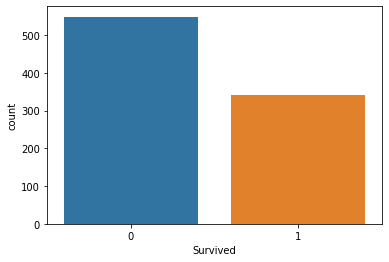

In [7]:
sns.countplot(x='Survived', data=train)
plt.show()

Check numerical features:

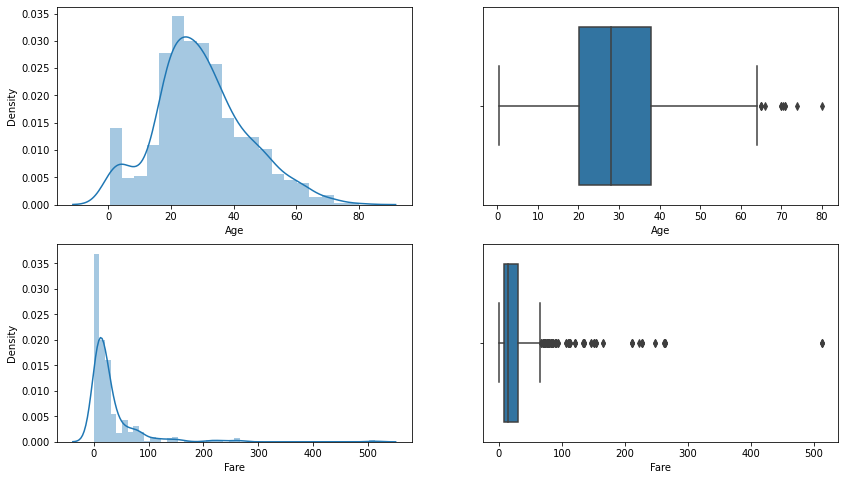

In [8]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
sns.distplot(train['Age'])
plt.subplot(2,2,2)
sns.boxplot(train['Age'])
plt.subplot(2,2,3)
sns.distplot(train['Fare'])
plt.subplot(2,2,4)
sns.boxplot(train['Fare'])
plt.show()

Other variables from target variable on the plot:

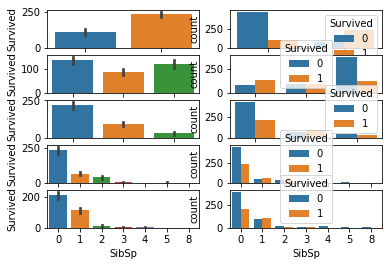

In [9]:
plt.subplot(5,2,1)
sns.barplot(x='Sex',y='Survived', data=train, estimator=np.sum)
plt.subplot(5,2,2)
sns.countplot(x='Sex', data=train, hue='Survived')

plt.subplot(5,2,3)
sns.barplot(x='Pclass',y='Survived', data=train, estimator=np.sum)
plt.subplot(5,2,4)
sns.countplot(x='Pclass', data=train, hue='Survived')

plt.subplot(5,2,5)
sns.barplot(x='Embarked',y='Survived', data=train, estimator=np.sum)
plt.subplot(5,2,6)
sns.countplot(x='Embarked', data=train,hue='Survived')

plt.subplot(5,2,7)
sns.barplot(x='Parch',y='Survived', data=train, estimator=np.sum)
plt.subplot(5,2,8)
sns.countplot(x='Parch', data=train,hue='Survived')

plt.subplot(5,2,9)
sns.barplot(x='SibSp',y='Survived', data=train, estimator=np.sum)
plt.subplot(5,2,10)
sns.countplot(x='SibSp', data=train,hue='Survived')
plt.show()

**Preparing data**

Check null values in the dataset:

In [10]:
null = pd.DataFrame(train.isnull().sum(), columns=['null'])
null['null_percentage'] = round(train.isnull().sum()/len(train)*100,2)
null

,null,null_percentage
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


Impute the null values:

In [11]:
# impute age with the median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(train['Age'].median(),inplace=True)
#impute embarked with mode
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
test['Fare'].fillna(train['Fare'].median(), inplace=True)
# cabin value has more than 77% of null values; imputing will distort the dataset. 
train.drop(['PassengerId','Cabin','Ticket','Name'], axis=1,inplace=True)
test.drop(['Cabin','Ticket','Name'], axis=1,inplace=True)

train.info()
print('*'*50)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    in

**Feature Engineering**

In [12]:
# family members
train['family_size'] = train['SibSp'] + train['Parch'] + 1
test['family_size'] = test['SibSp'] + test['Parch'] + 1

# single or with family
train['single'] = train['family_size'].apply(lambda x: 0 if x>1 else 1)
test['single'] = train['family_size'].apply(lambda x: 0 if x>1 else 1)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,single
0,0,3,male,22.0,1,0,7.2500,S,2,0
1,1,1,female,38.0,1,0,71.2833,C,2,0
2,1,3,female,26.0,0,0,7.9250,S,1,1
3,1,1,female,35.0,1,0,53.1000,S,2,0
4,0,3,male,35.0,0,0,8.0500,S,1,1


Label enoding:

In [13]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

train['Sex'] = label.fit_transform(train['Sex'])
test['Sex'] = label.fit_transform(test['Sex'])

train['Embarked'] = label.fit_transform(train['Embarked'])
test['Embarked'] = label.fit_transform(test['Embarked'])

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,single
0,0,3,1,22.0,1,0,7.2500,2,2,0
1,1,1,0,38.0,1,0,71.2833,0,2,0
2,1,3,0,26.0,0,0,7.9250,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,2,0
4,0,3,1,35.0,0,0,8.0500,2,1,1


In [14]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,single
0,892,3,1,34.5,0,0,7.8292,1,1,0
1,893,3,0,47.0,1,0,7.0000,2,2,0
2,894,2,1,62.0,0,0,9.6875,1,1,1
3,895,3,1,27.0,0,0,8.6625,2,1,0
4,896,3,0,22.0,1,1,12.2875,2,3,1


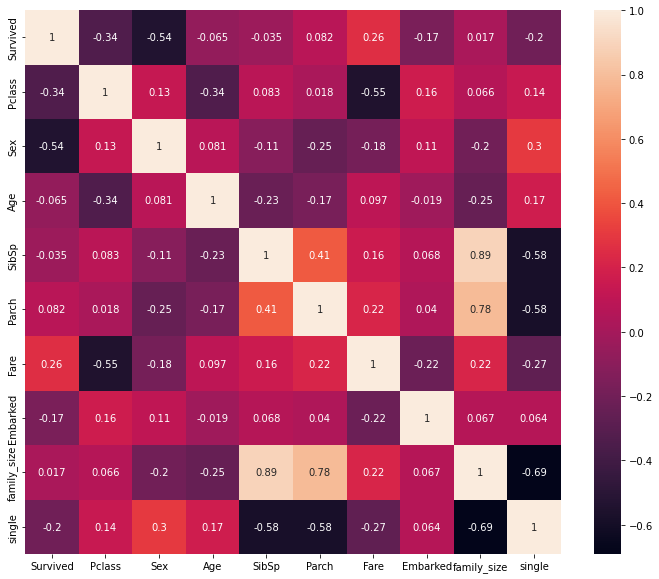

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(),annot=True)
plt.show()

Removing highly correlated features - SibSp, Parch:

In [16]:
train = train.drop(['SibSp', 'Parch'], axis=1)
test = test.drop(['SibSp', 'Parch'], axis=1)

**Model Data**

In [17]:
X = train.drop('Survived',axis=1)
y = train['Survived']
X_test = test.drop('PassengerId',axis=1)

X.head()

,Pclass,Sex,Age,Fare,Embarked,family_size,single
0,3,1,22.0,7.2500,2,2,0
1,1,0,38.0,71.2833,0,2,0
2,3,0,26.0,7.9250,2,1,1
3,1,0,35.0,53.1000,2,2,0
4,3,1,35.0,8.0500,2,1,1


In [18]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,family_size,single
0,3,1,34.5,7.8292,1,1,0
1,3,0,47.0,7.0000,2,2,0
2,2,1,62.0,9.6875,1,1,1
3,3,1,27.0,8.6625,2,1,0
4,3,0,22.0,12.2875,2,3,1


In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)
prediction = model.predict(X_test)

In [20]:
output = pd.DataFrame({'PassengerId' : test['PassengerId'], 'Survived' : prediction})
output.to_csv('submission.csv',index=False)